# Trabalho de Processamento Digital de Sinais (ENGC63)


- Projete, a partir de um filtro passa-baixas Butterworth de sexta ordem, um filtro discreto passa-baixas com frequência de corte (-3dB) igual ω c = 2π/3, usando o método da invariância da resposta
impulsiva (**Projeto1**) ou usando o método de transformação bilinear (**Projeto2**) 

- Faça a implementação sob forma direta e sob forma em cascata. 

- Represente os coeficientes em ponto flutuante (ex.: 0, 00423578 = 0, 423578 × 10 − 2 ) e vá diminuindo o número de casas decimais após a vı́rgula nas formas direta e em cascata para verificar a sensibilidade à quantização de parâmetros. 

- Trace a curva do módulo da resposta em freqência em dB para os casos de precisão infinita e precisão finita. 
Em seguida, para a representação em forma direta, refaça os filtros com as 3 transformações em frequência a seguir (Z − 1 = −z − 1 ; Z − 1 = z − 2 e Z − 1 = −z − 2 ) e trace a curva do módulo em dB da resposta em frequência resultante. 

- Use os seus filtros para processar um sinal de áudio de sua preferência, ouça os resultados e os avalie perceptualmente. Avalie, também, o espectro em função do tempo, do sinal de entrada e de saída utilizando um espectrograma.


In [4]:
### IMPORTS ###
import numpy as np
from scipy import signal, fft
import matplotlib.pyplot as plt
import math

[-12 -12 -11 -11 -11 -12 -12]


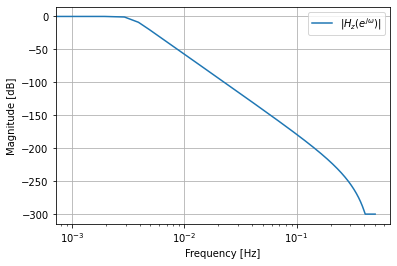

In [106]:
ordem = 6
wc = 2*np.pi/3
fs = 100
filts = signal.lti(*signal.butter(ordem, wc, btype='lowpass', analog=True, output='ba'))
filtz = signal.lti(*signal.bilinear(filts.num, filts.den, fs))
wz, hz = signal.freqz(filtz.num, filtz.den)
plt.semilogx(wz*1/(2*np.pi), 20*np.log10(np.abs(hz).clip(1e-15)),label=r'$|H_z(e^{j \omega})|$')
plt.legend()
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude [dB]')
plt.grid()
print(np.floor(np.log10(np.abs(filtz.num))).astype(int))

In [67]:
float_formatter = "{:#0.5e}".format
float_formatter(0.0000000051231519)

'5.12315e-09'